<a href="https://colab.research.google.com/github/Jaskaran197/Red-blood-cell-detection-SSD/blob/main/Red_blood_cell_detection_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Jaskaran197/Red-blood-cell-detection-SSD

Cloning into 'Red-blood-cell-detection-SSD'...
remote: Enumerating objects: 354, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 354 (delta 1), reused 0 (delta 0), pack-reused 348
Receiving objects: 100% (354/354), 17.76 MiB | 24.19 MiB/s, done.
Resolving deltas: 100% (131/131), done.


In [2]:
import os

In [3]:
os.chdir('Red-blood-cell-detection-SSD')

In [4]:
#!pip install -r requirements.txt

In [5]:
#!cp -R Red-blood-cell-detection-SSD/* ./

In [6]:

#!cd Red-blood-cell-detection-SSD  

In [7]:
#!python train.py configs/ssd300_vgg16_pascal-voc-2007.json ./ ./ --training_split=train.txt --validation_split=val.txt --label_maps label_map.txt --learning_rate=0.001 --epochs=50 --batch_size=9 --shuffle=True --augment=True --output_dir=./

In [8]:
# Download trained model from my google drive

In [9]:

!curl -L -o model.h5 https://drive.google.com/uc?id=1RBoIjYnoN6GVxoArBUJ-dzskcpiLxfj0 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   377    0   377    0     0    221      0 --:--:--  0:00:01 --:--:--   221
100 91.2M  100 91.2M    0     0  30.8M      0  0:00:02  0:00:02 --:--:--  112M


In [10]:
import os
import cv2
import numpy as np
from networks import SSD_VGG16
from tensorflow.keras.applications import vgg16
from utils import ssd_utils


def ssd_vgg16(config, filepath):

    with open(filepath, "r") as file:
        label_maps = [line.strip("\n") for line in file.readlines()]

    model = SSD_VGG16(
        config,
        label_maps,
        is_training=False,
        num_predictions=20
    )
    process_input_fn = vgg16.preprocess_input

    return model, process_input_fn, label_maps

In [11]:
import cv2
import os
import json
import argparse
import numpy as np
from glob import glob
from utils import inference_utils
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
%matplotlib inline

#parser = argparse.ArgumentParser(
#    description='run inference on an input image.')
#parser.add_argument('images', type=str,
 #                   help='glob string for list of images.')
#parser.add_argument('config', type=str, help='path to config file.')
#parser.add_argument('weights', type=str, help='path to the weight file.')
###parser.add_argument('--label_maps', type=str, help='path to label maps file.')
#parser.add_argument('--confidence_threshold', type=float,
 #                   help='the confidence score a detection should match in order to be counted.', default=0.9)
#parser.add_argument('--num_predictions', type=int,
 #                   help='the number of detections to be output as final detections', default=10)
#args = parser.parse_args()

# assert os.path.exists(args.input_image), "config file does not exist"
#assert os.path.exists(args.config), "config file does not exist"
#assert args.num_predictions > 0, "num_predictions must be larger than zero"
##assert args.confidence_threshold > 0, "confidence_threshold must be larger than zero."
#assert args.confidence_threshold <= 1, "confidence_threshold must be smaller than or equal to 1."
print(json)
with open(r'configs/ssd300_vgg16_pascal-voc-2007.json', "r") as config_file:
  config = json.load(config_file)

input_size = config["model"]["input_size"]
model_config = config["model"]
label_maps="label_maps.txt"
if model_config["name"] == "ssd_vgg16":
    model, process_input_fn, label_maps = ssd_vgg16(config, "label_map.txt")
elif model_config["name"] == "ssd_mobilenetv1":
    model, process_input_fn, label_maps = inference_utils.ssd_mobilenetv1(config, args)
elif model_config["name"] == "ssd_mobilenetv2":
    model, process_input_fn, label_maps = inference_utils.ssd_mobilenetv2(config, args)
elif model_config["name"] == "tbpp_vgg16":
    model, process_input_fn, label_maps = inference_utils.tbpp_vgg16(config, args)
else:
    print(
        f"model with name ${model_config['name']} has not been implemented yet")
    exit()

model.load_weights("model.h5")

<module 'json' from '/usr/lib/python3.7/json/__init__.py'>
58892288/58889256 [==============================] - 1s 0us/step


In [12]:

imag= list(glob('images/*'))

In [13]:
os.listdir()

['README.md',
 '.gitignore',
 'inferenceMat.py',
 'test.py',
 'inference.sh',
 'webcam.py',
 'test.sh',
 '.git',
 'images',
 'utils',
 'model.h5',
 'training.csv',
 '.DS_Store',
 'val.txt',
 'train.py',
 '.gitattributes',
 'display_default_boxes.py',
 'networks',
 'data_generators',
 '__init__.py',
 'configs',
 'inference.py',
 'convert.py',
 'playground.py',
 'train.sh',
 'image-100..xml',
 'requirements.txt',
 'evaluate.sh',
 'train.txt',
 'Red_blood_cell_detection.ipynb',
 'annotations',
 'losses',
 'filename.xml',
 'label_map.txt',
 'custom_layers',
 'Untitled.ipynb',
 'jaskaran.csv',
 'LICENSE',
 'image-100.xml',
 'annotations.csv',
 'evaluate.py',
 'callbacks']

In [14]:
import pandas as pd
df = pd.read_csv('annotations.csv')

In [15]:
df['path']=df['image'].str[:-3]+'xml'

In [16]:
with open('val.txt','r') as file:
  dftext = file.read()

In [17]:
ig = dftext.split('\n')
files=[]
annotations=[]
for i in ig:
  files.append(i.split(' ')[0])
  annotations.append(i.split(' ')[1])


In [18]:

files

['images/image-45.png',
 'images/image-44.png',
 'images/image-46.png',
 'images/image-39.png',
 'images/image-37.png',
 'images/image-4.png',
 'images/image-43.png',
 'images/image-38.png',
 'images/image-68.png',
 'images/image-30.png',
 'images/image-34.png',
 'images/image-36.png',
 'images/image-32.png',
 'images/image-21.png']

In [19]:

annotations

['annotations/image-45.xml',
 'annotations/image-44.xml',
 'annotations/image-46.xml',
 'annotations/image-39.xml',
 'annotations/image-37.xml',
 'annotations/image-4.xml',
 'annotations/image-43.xml',
 'annotations/image-38.xml',
 'annotations/image-68.xml',
 'annotations/image-30.xml',
 'annotations/image-34.xml',
 'annotations/image-36.xml',
 'annotations/image-32.xml',
 'annotations/image-21.xml']

In [20]:
nb=[]
for i in annotations:
  nb.append(i.split('/')[1])

In [21]:

testdf =df[df['path'].isin(nb)]

In [22]:

testdf['path'] = testdf['path'].apply(lambda x: "{}{}".format('annotations/', x))
testdf['image'] = testdf['image'].apply(lambda x: "{}{}".format('images/', x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:

testdf

image        xmin  ...  label                      path
1662  images/image-45.png   94.871477  ...    wbc  annotations/image-45.xml
1663  images/image-45.png    0.000000  ...    rbc  annotations/image-45.xml
1664  images/image-45.png   19.839910  ...    rbc  annotations/image-45.xml
1665  images/image-45.png    1.347238  ...    rbc  annotations/image-45.xml
1666  images/image-45.png   80.817362  ...    rbc  annotations/image-45.xml
...                   ...         ...  ...    ...                       ...
1994  images/image-21.png    0.000000  ...    rbc  annotations/image-21.xml
1995  images/image-21.png   95.164600  ...    rbc  annotations/image-21.xml
1996  images/image-21.png   79.636979  ...    rbc  annotations/image-21.xml
1997  images/image-21.png  149.843292  ...    rbc  annotations/image-21.xml
1998  images/image-21.png  210.569335  ...    rbc  annotations/image-21.xml

[337 rows x 7 columns]

In [24]:

def bb_intersection_over_union(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[2], boxB[2])
	yB = min(boxA[3], boxB[3])
	# compute the area of intersection rectangle
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
	boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	iou = interArea / float(boxAArea + boxBArea - interArea)
	# return the intersection over union value
	return iou

In [25]:

	iou = bb_intersection_over_union(detection.gt, detection.pred)

IndentationError: ignored

In [ ]:

for detection in examples:
	# load the image
	image = cv2.imread(detection.image_path)
	# draw the ground-truth bounding box along with the predicted
	# bounding box
	cv2.rectangle(image, tuple(detection.gt[:2]), 
		tuple(detection.gt[2:]), (0, 255, 0), 2)
	cv2.rectangle(image, tuple(detection.pred[:2]), 
		tuple(detection.pred[2:]), (0, 0, 255), 2)
	# compute the intersection over union and display it
	iou = bb_intersection_over_union(detection.gt, detection.pred)

In [43]:

imag

['images/image-7.png',
 'images/image-108.png',
 'images/image-50.png',
 'images/image-74.png',
 'images/image-21.png',
 'images/image-73.png',
 'images/image-82.png',
 'images/image-99.png',
 'images/image-116.png',
 'images/image-24.png',
 'images/image-89.png',
 'images/image-11.png',
 'images/image-78.png',
 'images/image-88.png',
 'images/image-8.png',
 'images/image-80.png',
 'images/image-46.png',
 'images/image-37.png',
 'images/image-2.png',
 'images/image-102.png',
 'images/image-70.png',
 'images/image-65.png',
 'images/image-33.png',
 'images/image-87.png',
 'images/image-69.png',
 'images/image-119.png',
 'images/image-19.png',
 'images/image-28.png',
 'images/image-12.png',
 'images/image-23.png',
 'images/image-117.png',
 'images/image-62.png',
 'images/image-75.png',
 'images/image-91.png',
 'images/image-53.png',
 'images/image-85.png',
 'images/image-112.png',
 'images/image-101.png',
 'images/image-72.png',
 'images/image-30.png',
 'images/image-76.png',
 'images/ima

In [48]:

testdf['image']

1662    images/image-45.png
1663    images/image-45.png
1664    images/image-45.png
1665    images/image-45.png
1666    images/image-45.png
               ...         
1994    images/image-21.png
1995    images/image-21.png
1996    images/image-21.png
1997    images/image-21.png
1998    images/image-21.png
Name: image, Length: 337, dtype: object

In [30]:

testdf

image        xmin  ...  label                      path
1662  images/image-45.png   94.871477  ...    wbc  annotations/image-45.xml
1663  images/image-45.png    0.000000  ...    rbc  annotations/image-45.xml
1664  images/image-45.png   19.839910  ...    rbc  annotations/image-45.xml
1665  images/image-45.png    1.347238  ...    rbc  annotations/image-45.xml
1666  images/image-45.png   80.817362  ...    rbc  annotations/image-45.xml
...                   ...         ...  ...    ...                       ...
1994  images/image-21.png    0.000000  ...    rbc  annotations/image-21.xml
1995  images/image-21.png   95.164600  ...    rbc  annotations/image-21.xml
1996  images/image-21.png   79.636979  ...    rbc  annotations/image-21.xml
1997  images/image-21.png  149.843292  ...    rbc  annotations/image-21.xml
1998  images/image-21.png  210.569335  ...    rbc  annotations/image-21.xml

[337 rows x 7 columns]

In [29]:
for i,j in testdf.iterrows():
  print(i,j)


1662 image         images/image-45.png
xmin                      94.8715
ymin                      139.273
xmax                      191.205
ymax                      239.705
label                         wbc
path     annotations/image-45.xml
Name: 1662, dtype: object
1663 image         images/image-45.png
xmin                            0
ymin                            0
xmax                      14.2097
ymax                       40.938
label                         rbc
path     annotations/image-45.xml
Name: 1663, dtype: object
1664 image         images/image-45.png
xmin                      19.8399
ymin                      1.87824
xmax                      74.7035
ymax                      52.7768
label                         rbc
path     annotations/image-45.xml
Name: 1664, dtype: object
1665 image         images/image-45.png
xmin                      1.34724
ymin                       28.292
xmax                      53.7779
ymax                      84.0361
label             

In [31]:

testdf.head()

image       xmin  ...  label                      path
1662  images/image-45.png  94.871477  ...    wbc  annotations/image-45.xml
1663  images/image-45.png   0.000000  ...    rbc  annotations/image-45.xml
1664  images/image-45.png  19.839910  ...    rbc  annotations/image-45.xml
1665  images/image-45.png   1.347238  ...    rbc  annotations/image-45.xml
1666  images/image-45.png  80.817362  ...    rbc  annotations/image-45.xml

[5 rows x 7 columns]

In [46]:
images = list(set(testdf['image'].tolist()))


In [122]:

!touch test.txt

In [49]:

for i,rows in testdf[testdf['image']=='images/image-45.png'].iterrows():
  print(rows['xmin'])

94.87147688838782
0.0
19.839909808342732
1.347237880496054
80.8173618940248
203.10033821871482
145.13979706877114
81.36527621195039
47.6651634723788
0.0
0.0
57.35400225479143
112.89289740698985
172.84216459977452
233.50056369785798
234.37316798196167
140.8432919954904
172.62908680947015
43.170236753100326
64.75873731679819
0.0
20.364148816234497
89.43855693348365
211.782412626832
152.6042841037204
178.77564825253663


In [54]:

from matplotlib import pyplot

[[  1.           0.99998724 158.70175     39.187824   212.54366
   96.56529   ]
 [  1.           0.9999833  144.7269      -2.9692545  204.74458
   45.844208  ]
 [  1.           0.9999758  219.05647    132.3068     277.01785
  189.42752   ]
 [  1.           0.99995816 227.57898    156.0299     287.24124
  216.90446   ]
 [  1.           0.99995065  41.203       -0.3865756  109.705444
   51.09466   ]
 [  1.           0.9998969  116.17258    224.04709    168.72462
  276.8593    ]
 [  1.           0.9998086    3.023404    67.79282     45.900356
  133.33994   ]
 [  1.           0.9997948   -2.4750443  223.97916     46.796455
  286.68704   ]
 [  1.           0.99972075 213.64021     23.642878   270.28763
   83.94651   ]
 [  1.           0.99963045 231.45625    218.0111     287.5557
  277.30975   ]
 [  1.           0.99959713 248.87448    246.64682    302.9752
  298.5526    ]
 [  1.           0.9995776  160.46219    208.49565    218.72374
  272.55313   ]
 [  1.           0.9994824   18.21678  

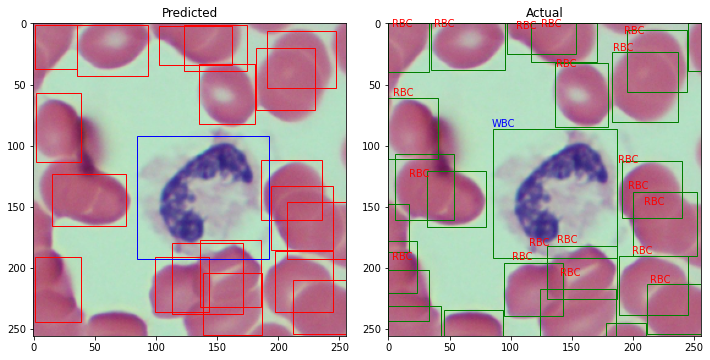



[[  1.           0.99998665  36.98447      0.5002297   98.234795
   39.658123  ]
 [  1.           0.999959    19.874525    92.79756     84.22244
  150.59787   ]
 [  1.           0.9999454  145.45609    203.50696    210.80504
  260.9191    ]
 [  1.           0.999938   118.479935   118.2544     182.62953
  178.99504   ]
 [  1.           0.99991536  -2.102883   134.88034     47.378956
  190.85486   ]
 [  1.           0.999895   250.77773     -0.76393783 302.4916
   66.85472   ]
 [  1.           0.99989104 139.31505    137.58359    198.83263
  201.55377   ]
 [  1.           0.9998851   32.249405   239.72758     99.243935
  304.2408    ]
 [  1.           0.9998198  195.32777     63.968266   254.43419
  127.50648   ]
 [  1.           0.9998109   -2.3777738    8.320132    45.578358
   76.99834   ]
 [  1.           0.99978715 217.98102    233.5638     277.18436
  292.79398   ]
 [  1.           0.999742   205.88326    116.304726   271.71417
  177.966     ]
 [  1.           0.99970573  -1.328

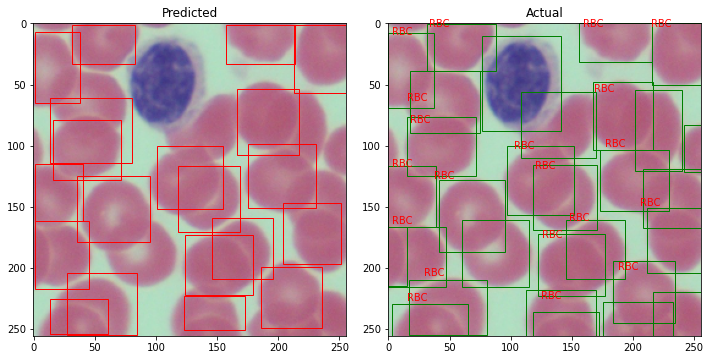



[[  1.           0.9999956  221.42287    201.4689     277.32086
  265.8291    ]
 [  1.           0.9999838   49.60333     34.505875   118.38053
   96.66259   ]
 [  1.           0.9999833   95.534645   181.75227    160.77818
  236.46352   ]
 [  1.           0.999959   112.47887     10.187178   181.91083
   72.18041   ]
 [  1.           0.9999385   30.78803     99.557686   104.81059
  164.49016   ]
 [  1.           0.9999342  248.02579      3.1212554  302.5082
   65.38603   ]
 [  1.           0.99986935 100.54775     76.69988    159.04395
  137.14311   ]
 [  1.           0.99985135 193.78528    189.34866    253.00305
  260.78143   ]
 [  1.           0.999589   130.22598    191.32777    191.7638
  254.23703   ]
 [  1.           0.99958354 237.70427     79.588524   294.02844
  155.86911   ]
 [  1.           0.9994941   -1.9247398   26.134262    48.434517
   88.60665   ]
 [  1.           0.9991823   60.056725   226.06122    118.44074
  285.1427    ]
 [  1.           0.99893636  -5.410496 

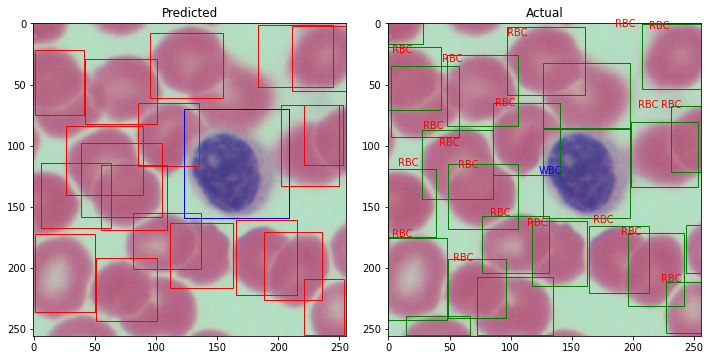



[[  1.           0.9999763    1.2516372   92.255356    69.16918
  154.59842   ]
 [  1.           0.9999354  107.253136    84.81242    164.04057
  141.36386   ]
 [  1.           0.9999063  228.65419     72.13022    284.51575
  136.79039   ]
 [  1.           0.9998877   -3.9022386  162.04645     59.06742
  225.38934   ]
 [  1.           0.9998317  216.63431     19.510874   279.43362
   77.12348   ]
 [  1.           0.9997737   43.24382    208.95135    101.63687
  272.9786    ]
 [  1.           0.99954295 145.25343    134.26357    208.97258
  189.37587   ]
 [  1.           0.99941945 111.170265     8.268879   189.63004
   61.05682   ]
 [  1.           0.9988507   60.030903   122.01356    122.14132
  188.59491   ]
 [  1.           0.99880075 146.27216     21.217186   207.3276
   80.94686   ]
 [  1.           0.9985884  175.54173     67.73965    241.71976
  127.84683   ]
 [  1.           0.99850816 203.73831     71.99738    261.55444
  123.98065   ]
 [  1.           0.9983683  107.63247  

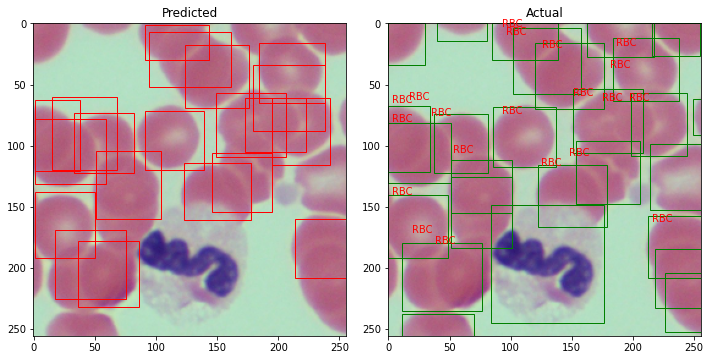



[[  2.           0.9999995  100.45125     78.28251    236.94533
  201.65512   ]
 [  1.           0.9999958  163.54129     18.366922   222.97035
   83.094925  ]
 [  1.           0.9999857   46.565964    34.64637    102.22371
   93.13551   ]
 [  1.           0.99997616 118.06285    221.7691     186.24385
  278.4956    ]
 [  1.           0.99995875 179.73686    243.4521     247.54675
  302.49924   ]
 [  1.           0.99993396 218.83649     -3.5899916  306.9553
   57.59679   ]
 [  1.           0.99991107  20.94026    225.68393     91.884544
  293.42896   ]
 [  1.           0.9997631  143.79459      6.943998   209.66228
   66.35054   ]
 [  1.           0.9996891   20.86683     79.89663     71.55629
  130.16422   ]
 [  1.           0.9995178   -0.9826027  127.99046     39.93828
  193.85133   ]
 [  1.           0.99945    229.81778    111.439026   294.8734
  187.14879   ]
 [  1.           0.9982089    1.8763281   71.21879     42.64378
  122.92444   ]
 [  1.           0.99805945 228.2619   

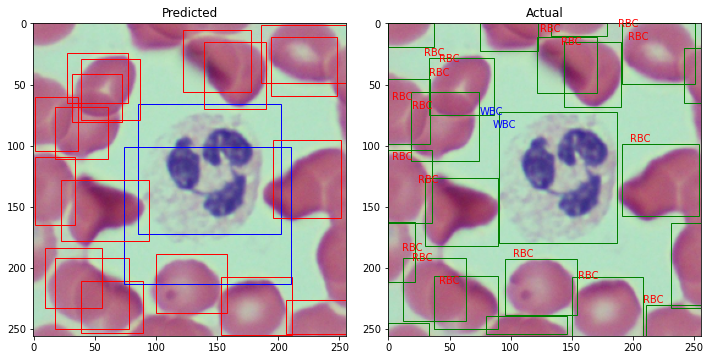



[[  1.           0.999977   194.51978    234.7975     252.77753
  295.14984   ]
 [  1.           0.99996364 124.34444    176.36595    195.97458
  225.10889   ]
 [  1.           0.99994934 208.65065     77.193306   268.84488
  135.71971   ]
 [  1.           0.99986875  -5.0983295  262.1675      51.129757
  299.70886   ]
 [  1.           0.9998479  204.25945    131.71231    262.5666
  193.82571   ]
 [  1.           0.999814    17.97977     82.330246    68.644226
  144.65907   ]
 [  1.           0.99980885  14.099074    19.828241    73.938835
   78.11778   ]
 [  1.           0.9996742  216.2746     153.1758     277.00897
  215.66983   ]
 [  1.           0.9996631   13.271103   174.3133      71.29543
  238.91737   ]
 [  1.           0.9994006  223.60046    217.14166    289.2816
  277.828     ]
 [  1.           0.99925154  53.404446    -3.6032596  112.17046
   46.48733   ]
 [  1.           0.99832934 119.33282    188.82031    180.35533
  239.46814   ]
 [  1.           0.99824286  48.83522

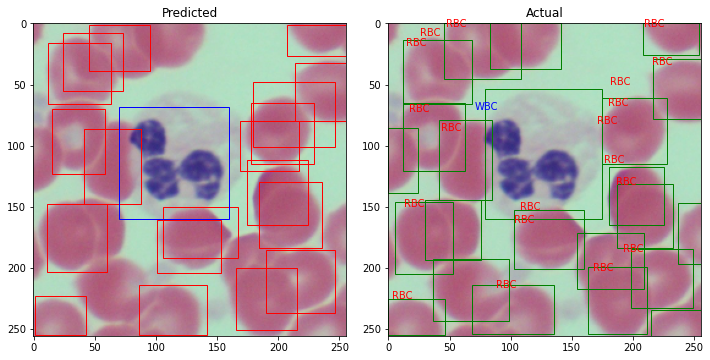



[[  1.           0.99998987   5.6006203   91.36135     67.34198
  156.14682   ]
 [  1.           0.99997675 192.67229    189.01561    254.99434
  247.3779    ]
 [  1.           0.9999726  136.08948    157.24904    187.17401
  214.56972   ]
 [  1.           0.99996936 188.20619     39.083282   245.65013
  107.277     ]
 [  1.           0.99996877  51.978813   259.84897    115.633286
  300.28763   ]
 [  1.           0.9999683  175.1153     132.09189    245.3186
  190.30688   ]
 [  1.           0.9999598  140.04137     76.681175   202.26453
  135.5298    ]
 [  1.           0.9999132  224.28864     91.84273    286.36725
  154.30798   ]
 [  1.           0.9998969   32.92569    203.45895     95.492615
  264.21948   ]
 [  1.           0.9998597   46.11091     47.82242    100.902626
  100.89928   ]
 [  1.           0.9998331  138.12823    224.50298    200.8977
  288.48868   ]
 [  1.           0.999793   221.49419     24.276062   273.23383
   81.649055  ]
 [  2.           0.99977213  64.91376

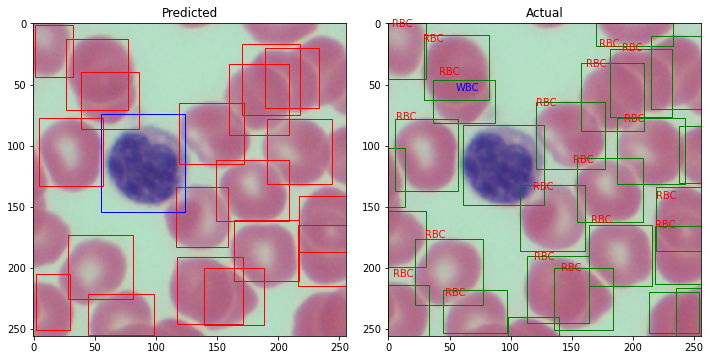



[[  1.           0.99998987 173.86919    211.3597     240.04523
  268.3204    ]
 [  1.           0.9999349    1.6219295   73.49759     65.94556
  153.75922   ]
 [  1.           0.9999348  184.56366    139.80339    248.1015
  201.37698   ]
 [  1.           0.99974567  66.10695     32.00258    133.05705
   99.63563   ]
 [  1.           0.9994229   49.305805   123.21264    113.030426
  187.57622   ]
 [  1.           0.9993839   29.632774   187.52525     99.75577
  250.05365   ]
 [  1.           0.9992742  102.450584   236.84233    170.44977
  296.43237   ]
 [  1.           0.9992231  233.25133     72.05474    296.15845
  140.83066   ]
 [  1.           0.99903286 120.716125   251.09665    182.96948
  303.62744   ]
 [  1.           0.9990274   -4.711821   245.98586     51.521015
  301.86288   ]
 [  1.           0.9989976    5.3015113   50.94935     65.73444
  113.791466  ]
 [  1.           0.99898046 197.44257     -2.9882782  264.30264
   60.543545  ]
 [  1.           0.99842525 203.56044

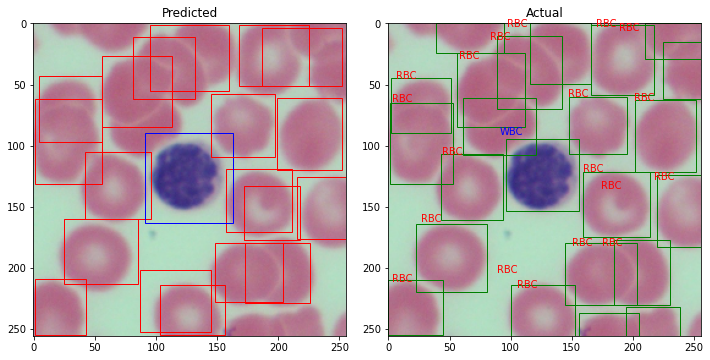



[[  1.           0.99998724   2.5302038  177.63937     68.14586
  239.92123   ]
 [  1.           0.99998486  93.991905    47.300087   165.08194
  114.79523   ]
 [  1.           0.9999689  225.34125    221.30925    288.38583
  290.15466   ]
 [  1.           0.99996257 187.89136    166.58768    259.90173
  233.14969   ]
 [  1.           0.99994576  46.83237      1.3969257  116.90998
   67.01482   ]
 [  1.           0.9999416  200.03401     99.65449    267.0311
  159.51427   ]
 [  1.           0.99986756  51.250404    92.6916     111.15777
  164.73096   ]
 [  1.           0.9998442  164.44421      7.182909   234.90938
   59.27824   ]
 [  1.           0.9998387  144.21017    221.10692    219.58098
  294.65015   ]
 [  1.           0.9996517   21.603065   235.97456     84.87727
  293.74588   ]
 [  1.           0.999302    68.505775   180.25008    139.75903
  246.54842   ]
 [  1.           0.9992513  227.98909     35.260742   287.4502
  105.44049   ]
 [  2.           0.999099    96.20771   

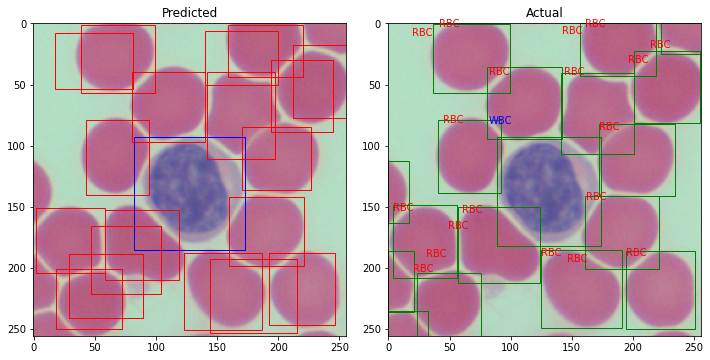



[[  1.           0.9999832  236.06027     46.886982   304.276
  118.2304    ]
 [  1.           0.9999701  202.47447    125.81851    261.00256
  197.90916   ]
 [  1.           0.9999529  216.71196     34.832348   281.30188
  111.45449   ]
 [  1.           0.99994886   8.706915    91.28949     90.42685
  155.03787   ]
 [  1.           0.9999294  176.10963    193.95518    241.80992
  256.8084    ]
 [  1.           0.9998901   69.11813     70.03242    149.92918
  128.32466   ]
 [  1.           0.9998211  229.957      223.94968    298.24658
  291.42822   ]
 [  1.           0.9997929   73.914505     3.3441982  139.00479
   66.04043   ]
 [  1.           0.9997116  161.92482     31.833172   225.94962
  103.63      ]
 [  1.           0.99949574  -0.6243065  233.62244     82.50654
  296.9379    ]
 [  1.           0.9992729   -0.52242506 181.94028     45.760006
  234.70534   ]
 [  1.           0.99916136 222.95569    119.88519    274.95642
  179.30403   ]
 [  1.           0.99885356   0.3920808

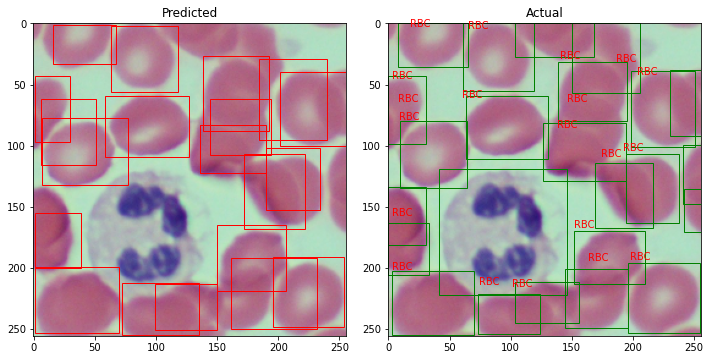



[[  1.           0.9999871    6.5144444   71.79115     55.802696
  124.28677   ]
 [  1.           0.9999813  190.23003    205.98431    253.82703
  274.51343   ]
 [  1.           0.9999629  222.23557    218.40002    284.95563
  278.59494   ]
 [  1.           0.99994206 111.6732     226.71492    178.40028
  273.58667   ]
 [  1.           0.999925   215.63237     89.478386   281.65967
  155.84842   ]
 [  1.           0.9998627  227.32649    155.34464    298.338
  213.46138   ]
 [  1.           0.99983764 224.58125     -7.717616   301.90677
   50.552925  ]
 [  1.           0.99980825  45.171825   130.17383    106.57467
  197.1439    ]
 [  1.           0.9997867  225.22        70.69181    295.8087
  140.3345    ]
 [  1.           0.9997578   -4.5230784  168.92201     62.94238
  218.6976    ]
 [  1.           0.99975425 120.4668      22.610456   184.91942
   91.71197   ]
 [  1.           0.9990829   65.04779    196.11322    114.98016
  255.80617   ]
 [  1.           0.998738    -6.049787  

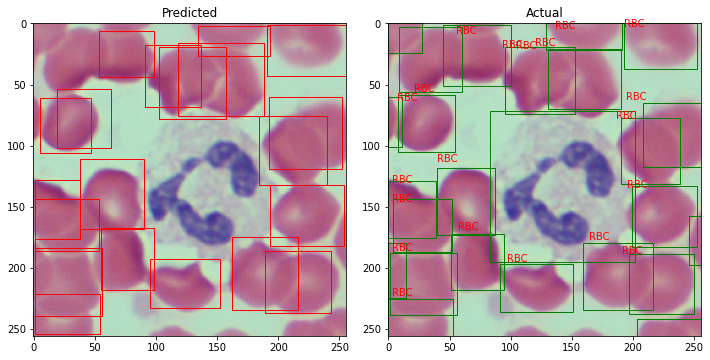



[[  1.           0.9999943   -1.7434202  167.09584     46.159832
  222.38927   ]
 [  1.           0.99998164  40.827675    31.443996    92.99449
  100.36173   ]
 [  1.           0.9998803  106.603264   148.58054    168.18552
  206.50658   ]
 [  1.           0.99978226 213.77087    160.38823    284.2848
  222.25334   ]
 [  1.           0.9997347   -7.8625402  250.82071     58.351143
  300.72247   ]
 [  1.           0.999713    43.699783    97.04572    109.88447
  160.1539    ]
 [  1.           0.999694   168.11752    193.80069    235.74223
  256.80103   ]
 [  1.           0.9993666   16.07125    161.62022     80.86779
  229.8779    ]
 [  1.           0.9986659    0.5485296   27.33082     39.088753
  104.419556  ]
 [  1.           0.99839383  62.863613    24.962572   120.36345
   94.02133   ]
 [  1.           0.9983005  211.90521     38.77232    287.8638
  109.96987   ]
 [  1.           0.9980287  172.45331    261.65555    242.74088
  303.0369    ]
 [  1.           0.99798644 119.35229

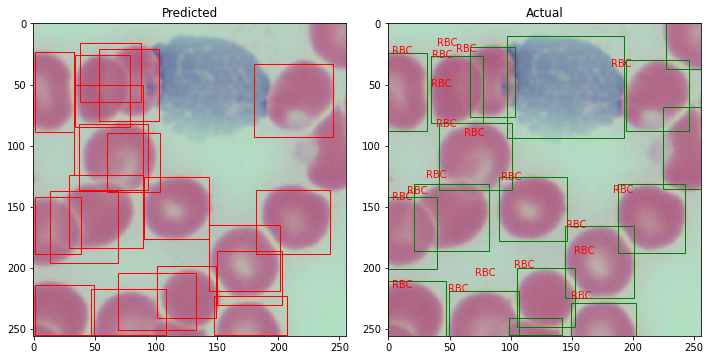



[[  1.           0.9999602   -2.635771   199.34996     46.407433
  266.10486   ]
 [  1.           0.99995553  -4.1366997  123.24002     49.94715
  186.98166   ]
 [  1.           0.99995315 176.97821      4.3991804  240.36882
   67.83752   ]
 [  1.           0.99977976 208.41551    217.33646    273.65985
  281.31094   ]
 [  1.           0.99977773 103.178665    27.81435    174.73672
   88.06508   ]
 [  1.           0.9997657   50.798447    56.33077    117.91315
  123.61813   ]
 [  1.           0.99975425 123.63909     73.2062     186.2289
  126.73881   ]
 [  1.           0.9997297  191.3634     112.2988     267.39273
  188.34103   ]
 [  1.           0.9996575   24.550232     7.745426    91.27304
   72.777     ]
 [  2.           0.99960905 108.329094   172.25636    224.06194
  261.0606    ]
 [  1.           0.9995247  162.13678    104.75195    229.05379
  173.84982   ]
 [  1.           0.9993957  232.08102     -0.7757641  298.5617
   35.37931   ]
 [  1.           0.9993937  192.07832  

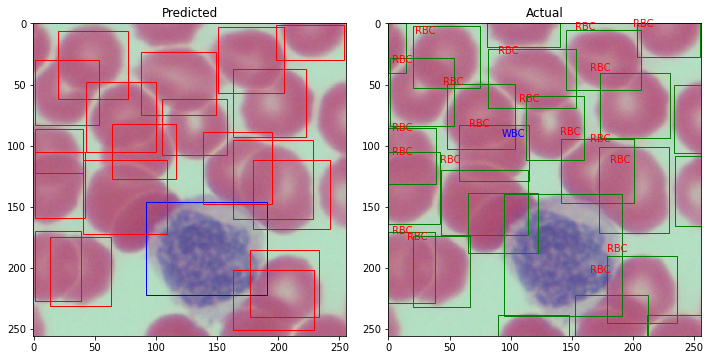



[[ 1.00000000e+00  9.99996662e-01  2.27784622e+02  1.62362823e+02
   2.90528351e+02  2.23983704e+02]
 [ 1.00000000e+00  9.99990582e-01  2.08941986e+02  7.92518768e+01
   2.70474365e+02  1.27115196e+02]
 [ 1.00000000e+00  9.99974251e-01  2.00334305e+02  1.01574760e+02
   2.66047729e+02  1.47599152e+02]
 [ 1.00000000e+00  9.99955058e-01  7.99375610e+01  1.05015686e+02
   1.33801361e+02  1.56515427e+02]
 [ 1.00000000e+00  9.99936342e-01 -6.12011242e+00  1.83719315e+02
   5.00997658e+01  2.51081146e+02]
 [ 2.00000000e+00  9.99913216e-01  1.18645996e+02  1.87749359e+02
   2.05134003e+02  2.96306305e+02]
 [ 1.00000000e+00  9.99906898e-01  2.00090164e+02  1.80404572e+02
   2.68763824e+02  2.36180939e+02]
 [ 1.00000000e+00  9.99876618e-01  4.78365555e+01  1.92306580e+02
   9.05033417e+01  2.41132324e+02]
 [ 1.00000000e+00  9.99715507e-01  1.21880007e+01  1.19216499e+01
   7.55856094e+01  8.72250900e+01]
 [ 1.00000000e+00  9.99656200e-01  1.65243607e+02  1.50343828e+01
   2.30309952e+02  7.52

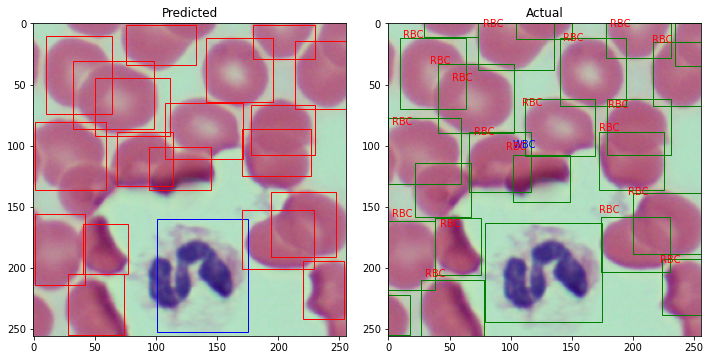



Mean IoU of test dataset 0.7382786081741562


In [117]:
averageiou=[]
predictedlabels=[]
actuallabels=[]
for idx, image_name in enumerate(images):
    #print(row)

    input_image = image_name
    image = cv2.imread(input_image)  # read image in bgr format
    im = Image.open(input_image)
    # image = cv2.resize(image, (0, 0), fx=0.3, fy=0.3)
    image = np.array(image, dtype=np.float)
    image = np.uint8(image)

    display_image = image.copy()
    image_height, image_width, _ = image.shape
    height_scale, width_scale = input_size/image_height, input_size/image_width

    image = cv2.resize(image, (input_size, input_size))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = process_input_fn(image)

    image = np.expand_dims(image, axis=0)
    y_pred = model.predict(image)
    print(y_pred[0])
    fig, ax = plt.subplots(1, 2, figsize=(10,7))
    fig.tight_layout()
    pyplot.subplot(121)
    plt.imshow(im)
    pyplot.title('Predicted')
    ax = plt.gca()
    pyplot.subplot(122, sharex=ax)
    plt.imshow(im)

    pyplot.title('Actual')
    ax1 = plt.gca()
    
    for i,row in testdf[testdf['image']==image_name].iterrows():
           #print(rows['xmin'])


    
           rect1 = Rectangle((row['xmin'],row['ymin']),row['xmax']-row['xmin'],row['ymax']-row['ymin'],linewidth=1,edgecolor='green',facecolor='none',label='Label')
           ax1.add_patch(rect1)
           

    for i, pred in enumerate(y_pred[0]):
        
        classname = label_maps[int(pred[0]) - 1].upper()
        confidence_score = pred[1]

        score = f"{'%.2f' % (confidence_score * 100)}%"
        print(f"-- {classname}: {score}")
        

        if confidence_score <= 1 and confidence_score > 0.5:
            xmin = max(int(pred[2] / width_scale), 1)
            ymin = max(int(pred[3] / height_scale), 1)
            xmax = min(int(pred[4] / width_scale), image_width-1)
            ymax = min(int(pred[5] / height_scale), image_height-1)
            maxiou=0
            label="" 
            for i,row in testdf[testdf['image']==image_name].iterrows():
           #print(rows['xmin'])

              iou = bb_intersection_over_union([xmin,ymin,xmax,ymax],[row['xmin'],row['ymin'],row['xmax'],row['ymax']])
              if(iou>maxiou):
                maxiou=iou
                label=row['label']
            actuallabels.append(label)
            predictedlabels.append(classname.lower())
              #rect1 = Rectangle((row['xmin'],row['ymin']),row['xmax']-row['xmin'],row['ymax']-row['ymin'],linewidth=1,edgecolor='green',facecolor='none',label='Label')
              #ax1.add_patch(rect1)

            if(classname=="WBC"):
                 
                rect = Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='b',facecolor='none',label='WBC')
                centerx = centery = xmin + 0.5/2 # obviously use a different formula for different shapes

                plt.text(centerx, centery,'WBC',color='blue')

            if(classname=="RBC"):
                rect = Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='r',facecolor='none',label="RBC")
                centerx, centery = xmin+2,ymin+2 # obviously use a different formula for different shapes

                plt.text(centerx, centery,'RBC',color='red')

            print(maxiou)
            averageiou.append(maxiou)
            

            ax.add_patch(rect)
    plt.show()





    print("\n")
print("Mean IoU of test dataset",sum(averageiou)/len(averageiou))


In [118]:
print(len(predictedlabels))
print(len(actuallabels))

280
280


In [119]:
predictedlabels

['rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'wbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'wbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'wbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'wbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'wbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',


In [120]:

actuallabels

['rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'wbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'wbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'wbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'wbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'wbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',
 'rbc',


In [121]:

from sklearn.metrics import accuracy_score
accuracy_score(predictedlabels,actuallabels)

1.0

In [ ]:

!python test.py val.txt ./ ./ configs/ssd300_vgg16_pascal-voc-2007.json model.h5 --label_maps label_map.txt --output_dir ./  --num_predictions 4

2021-12-13 23:29:29.799651: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
1/14
2021-12-13 23:29:35.355057: W tensorflow/core/common_runtime/bfc_allocator.cc:343] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.
2/14
3/14
4/14
5/14
6/14
7/14
8/14
9/14
10/14
11/14
12/14
13/14
14/14


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   377    0   377    0     0    228      0 --:--:--  0:00:01 --:--:--   227
100 91.2M  100 91.2M    0     0  39.4M      0  0:00:02  0:00:02 --:--:-- 39.4M


<module 'json' from '/usr/lib/python3.7/json/__init__.py'>
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.96%
-- RBC: 99.95%
-- RBC: 99.94%
-- RBC: 99.93%
-- RBC: 99.91%
-- RBC: 99.91%
-- RBC: 99.89%
-- WBC: 99.87%
-- RBC: 99.84%
-- RBC: 99.83%
-- RBC: 99.73%
-- RBC: 99.34%
-- RBC: 99.26%
-- RBC: 99.22%
-- RBC: 99.18%


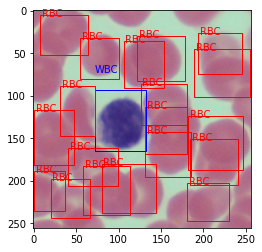



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- WBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.93%
-- RBC: 99.93%
-- RBC: 99.81%
-- RBC: 99.73%
-- RBC: 99.65%


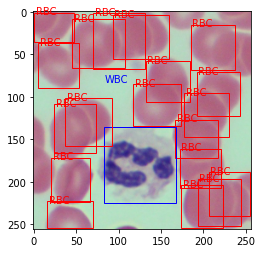



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- WBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.92%
-- RBC: 99.92%
-- RBC: 99.90%
-- RBC: 99.89%
-- RBC: 99.81%
-- RBC: 99.77%
-- RBC: 99.61%
-- RBC: 99.39%
-- RBC: 99.14%


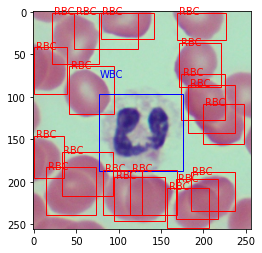



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.97%
-- WBC: 99.97%
-- RBC: 99.97%
-- RBC: 99.96%
-- RBC: 99.92%
-- RBC: 99.86%
-- RBC: 99.77%
-- RBC: 99.73%
-- RBC: 99.68%


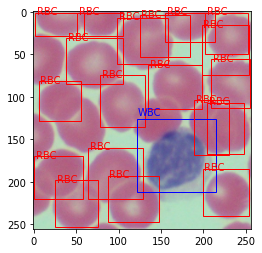



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.95%
-- RBC: 99.94%
-- RBC: 99.94%
-- WBC: 99.93%
-- RBC: 99.92%
-- RBC: 99.90%
-- RBC: 99.88%
-- RBC: 99.81%
-- RBC: 99.68%


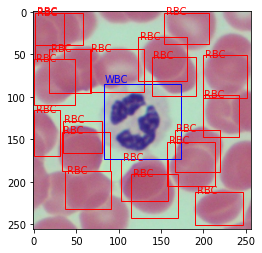



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.97%
-- RBC: 99.94%
-- RBC: 99.94%
-- RBC: 99.92%
-- RBC: 99.87%
-- RBC: 99.85%
-- RBC: 99.75%
-- WBC: 99.66%
-- RBC: 99.58%
-- RBC: 99.54%


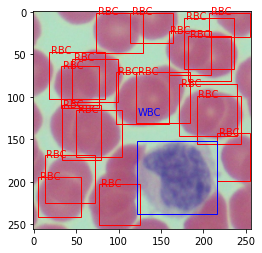



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- WBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.94%
-- RBC: 99.83%
-- RBC: 99.82%
-- RBC: 99.80%
-- RBC: 99.80%
-- RBC: 99.79%
-- RBC: 99.68%


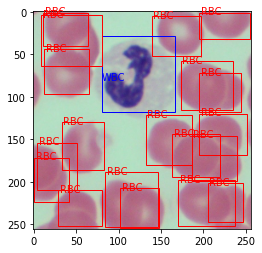



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.97%
-- RBC: 99.97%
-- RBC: 99.96%
-- WBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.83%
-- RBC: 99.76%
-- RBC: 99.75%
-- RBC: 99.69%
-- RBC: 99.51%
-- RBC: 99.40%
-- RBC: 99.30%


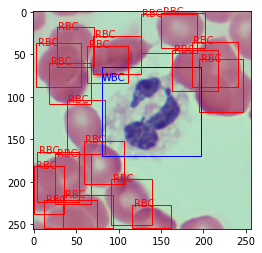



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.98%
-- WBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.92%
-- RBC: 99.87%
-- RBC: 99.69%
-- RBC: 99.68%


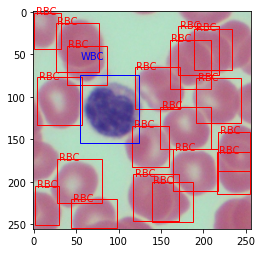



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.97%
-- WBC: 99.96%
-- RBC: 99.95%
-- RBC: 99.94%
-- RBC: 99.94%
-- RBC: 99.92%
-- RBC: 99.91%
-- RBC: 99.90%
-- RBC: 99.87%
-- RBC: 99.86%
-- RBC: 99.84%
-- RBC: 99.80%


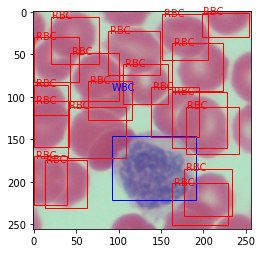



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.97%
-- RBC: 99.94%
-- RBC: 99.94%
-- RBC: 99.92%
-- WBC: 99.90%
-- RBC: 99.90%
-- RBC: 99.86%
-- RBC: 99.73%


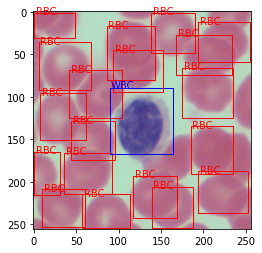



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- WBC: 99.97%
-- RBC: 99.97%
-- RBC: 99.95%
-- RBC: 99.95%
-- RBC: 99.86%
-- RBC: 99.82%
-- RBC: 99.69%
-- RBC: 99.61%
-- WBC: 99.59%
-- RBC: 99.59%
-- RBC: 99.47%
-- RBC: 99.13%
-- RBC: 98.91%


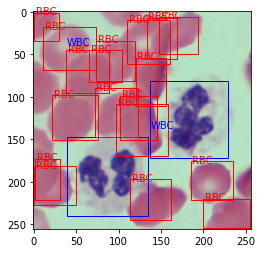



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.91%
-- RBC: 99.87%
-- RBC: 99.85%
-- RBC: 99.82%
-- RBC: 99.77%
-- RBC: 99.59%
-- RBC: 99.57%
-- RBC: 99.46%
-- RBC: 99.28%


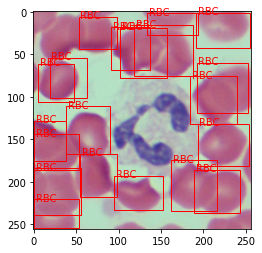



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.97%
-- RBC: 99.94%
-- RBC: 99.93%
-- RBC: 99.83%
-- RBC: 99.82%
-- RBC: 99.79%
-- RBC: 99.79%
-- RBC: 99.69%
-- RBC: 99.64%
-- RBC: 99.60%
-- WBC: 99.57%
-- RBC: 99.52%


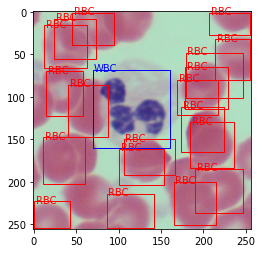



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.97%
-- RBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.92%
-- RBC: 99.92%
-- WBC: 99.92%
-- RBC: 99.90%
-- RBC: 99.90%
-- RBC: 99.88%
-- RBC: 99.86%
-- RBC: 99.60%
-- RBC: 99.37%
-- RBC: 99.26%


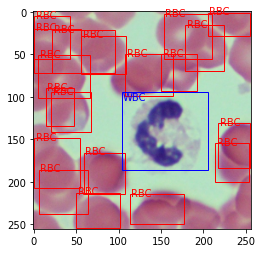



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.95%
-- RBC: 99.89%
-- RBC: 99.74%
-- WBC: 99.74%
-- RBC: 99.65%
-- RBC: 99.65%
-- RBC: 99.42%
-- RBC: 99.02%
-- RBC: 98.96%
-- RBC: 98.93%


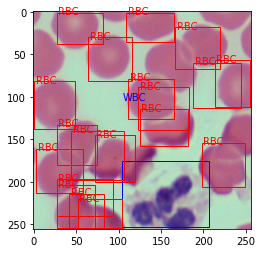



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.96%
-- RBC: 99.96%
-- WBC: 99.91%
-- RBC: 99.89%
-- RBC: 99.89%
-- RBC: 99.86%
-- RBC: 99.84%
-- RBC: 99.80%


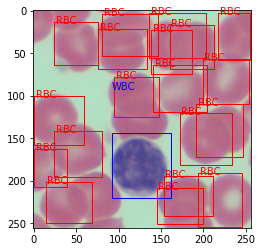



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.95%
-- RBC: 99.93%
-- RBC: 99.92%
-- RBC: 99.89%
-- RBC: 99.85%
-- RBC: 99.83%
-- RBC: 99.82%
-- RBC: 99.82%
-- RBC: 99.81%
-- RBC: 99.72%
-- RBC: 99.60%


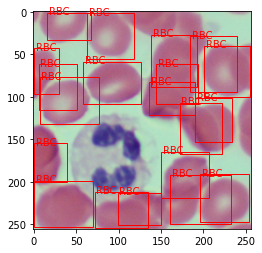



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.96%
-- RBC: 99.69%
-- RBC: 99.68%
-- RBC: 99.52%
-- RBC: 98.85%
-- RBC: 98.76%
-- RBC: 98.47%
-- RBC: 98.07%
-- RBC: 98.07%
-- RBC: 97.96%
-- RBC: 97.68%


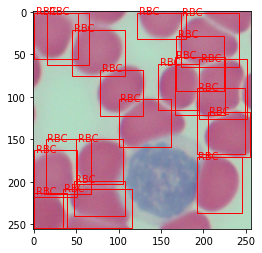



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.96%
-- RBC: 99.96%
-- WBC: 99.95%
-- RBC: 99.95%
-- RBC: 99.95%
-- RBC: 99.90%
-- RBC: 99.89%
-- RBC: 99.86%
-- RBC: 99.68%


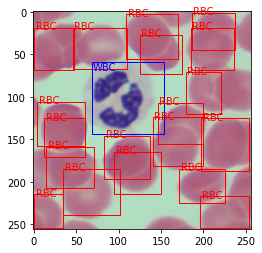



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.97%
-- RBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.96%
-- RBC: 99.95%
-- RBC: 99.95%
-- RBC: 99.93%


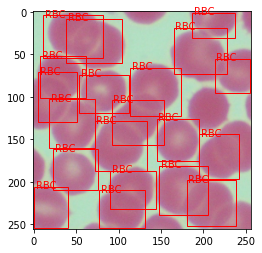



-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 100.00%
-- RBC: 99.99%
-- RBC: 99.99%
-- RBC: 99.98%
-- RBC: 99.98%
-- RBC: 99.97%
-- RBC: 99.95%
-- WBC: 99.94%
-- RBC: 99.93%
-- RBC: 99.92%
-- RBC: 99.87%
-- RBC: 99.86%
-- RBC: 99.85%
-- RBC: 99.70%
-- RBC: 99.62%
-- RBC: 99.06%
-- RBC: 98.04%


KeyboardInterrupt: ignored

In [15]:
import cv2
import os
import json
import argparse
import numpy as np
from glob import glob
from utils import inference_utils
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
%matplotlib inline

#parser = argparse.ArgumentParser(
#    description='run inference on an input image.')
#parser.add_argument('images', type=str,
 #                   help='glob string for list of images.')
#parser.add_argument('config', type=str, help='path to config file.')
#parser.add_argument('weights', type=str, help='path to the weight file.')
###parser.add_argument('--label_maps', type=str, help='path to label maps file.')
#parser.add_argument('--confidence_threshold', type=float,
 #                   help='the confidence score a detection should match in order to be counted.', default=0.9)
#parser.add_argument('--num_predictions', type=int,
 #                   help='the number of detections to be output as final detections', default=10)
#args = parser.parse_args()

# assert os.path.exists(args.input_image), "config file does not exist"
#assert os.path.exists(args.config), "config file does not exist"
#assert args.num_predictions > 0, "num_predictions must be larger than zero"
##assert args.confidence_threshold > 0, "confidence_threshold must be larger than zero."
#assert args.confidence_threshold <= 1, "confidence_threshold must be smaller than or equal to 1."
print(json)
with open(r'configs/ssd300_vgg16_pascal-voc-2007.json', "r") as config_file:
  config = json.load(config_file)

input_size = config["model"]["input_size"]
model_config = config["model"]
label_maps="label_maps.txt"
if model_config["name"] == "ssd_vgg16":
    model, process_input_fn, label_maps = ssd_vgg16(config, "label_map.txt")
elif model_config["name"] == "ssd_mobilenetv1":
    model, process_input_fn, label_maps = inference_utils.ssd_mobilenetv1(config, args)
elif model_config["name"] == "ssd_mobilenetv2":
    model, process_input_fn, label_maps = inference_utils.ssd_mobilenetv2(config, args)
elif model_config["name"] == "tbpp_vgg16":
    model, process_input_fn, label_maps = inference_utils.tbpp_vgg16(config, args)
else:
    print(
        f"model with name ${model_config['name']} has not been implemented yet")
    exit()

model.load_weights("model.h5")


for idx, input_image in enumerate(list(glob('images/*'))):
    image = cv2.imread(input_image)  # read image in bgr format
    im = Image.open(input_image)
    # image = cv2.resize(image, (0, 0), fx=0.3, fy=0.3)
    image = np.array(image, dtype=np.float)
    image = np.uint8(image)

    display_image = image.copy()
    image_height, image_width, _ = image.shape
    height_scale, width_scale = input_size/image_height, input_size/image_width

    image = cv2.resize(image, (input_size, input_size))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = process_input_fn(image)

    image = np.expand_dims(image, axis=0)
    y_pred = model.predict(image)
    plt.imshow(im)
    ax = plt.gca()

    for i, pred in enumerate(y_pred[0]):
        classname = label_maps[int(pred[0]) - 1].upper()
        confidence_score = pred[1]

        score = f"{'%.2f' % (confidence_score * 100)}%"
        print(f"-- {classname}: {score}")
        

        if confidence_score <= 1 and confidence_score > 0.7:
            xmin = max(int(pred[2] / width_scale), 1)
            ymin = max(int(pred[3] / height_scale), 1)
            xmax = min(int(pred[4] / width_scale), image_width-1)
            ymax = min(int(pred[5] / height_scale), image_height-1)


            if(classname=="WBC"):
                rect = Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='b',facecolor='none',label='WBC')
                centerx = centery = xmin + 0.5/2 # obviously use a different formula for different shapes

                plt.text(centerx, centery,'WBC',color='blue')

            if(classname=="RBC"):
                rect = Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='r',facecolor='none',label="RBC")
                centerx, centery = xmin+2,ymin+2 # obviously use a different formula for different shapes

                plt.text(centerx, centery,'RBC',color='red')


            

            ax.add_patch(rect)
    plt.show()





    print("\n")

